In [29]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import math


from sklearn.model_selection import GridSearchCV , cross_val_predict
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier

from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score

from keras.layers import LSTM, Input, Dense, Reshape
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.activations import relu, elu

from scipy.stats import bernoulli
from sklearn.model_selection import train_test_split as split

In [30]:
# load the dataset
dataframe = pandas.read_csv('IBM.1Min.TradesOnly.20160128.csv', usecols=[6], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.head(5)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



In [33]:


 #convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
#plt.plot(train)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))

# Segment the train_data based on new window_size; split into train and validation (80/20)
X_train, X_val, y_train, y_val = split(trainX, trainY, test_size = 0.20, shuffle=False)

# define the grid search parameters

num_units=[10,12,24]
activation=['relu']
batch_size = [10,20,30]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, activation=activation, epochs=epochs, num_units=num_units)

## Gridsearchcv model for optimizing
def grid_model(activation='relu',num_units=1):
    model = Sequential()
    #model.add(Reshape((-1,1), input_shape=(train_X.shape[1], train_X.shape[2]))
    model.add(LSTM(num_units,input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1,activation=activation))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
    #model.fit(trainX, trainY, epochs=param_grid['epochs'], batch_size=param_grid['batch_size'], verbose=2,validation_data=[X_val, y_val])                    
    return model



In [34]:
model = KerasClassifier(build_fn=grid_model, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1)

In [16]:
#!pip install update sklearn

In [35]:
X_train.shape

(227, 1, 1)

In [36]:
y_train.shape


(227,)

In [37]:
grid.fit(X_train, y_train, validation_split = 0.05,verbose=2)





c:\users\sravanajyothi.n\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\sravanajyothi.n\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train on 215 samples, validate on 12 samples
Epoch 1/50
 - 28s - loss: 3560.6186 - acc: 0.0140 - val_loss: 8765.5000 - val_acc: 0.0000e+00
Epoch 2/50
 - 0s - loss: 3560.6186 - acc: 0.0140 - val_loss: 8765.5000 - val_acc: 0.0000e+00
Epoch 3/50
 - 0s - loss: 3560.6185 - acc: 0.0140 - val_loss: 8765.5000 - val_acc: 0.0000e+00
Epoch 4/50
 - 0s - loss: 3560.6186 - acc: 0.0140 - val_loss: 8765.5000 - val_acc: 0.0000e+00
Epoch 5/50
 - 0s - loss: 3560.6186 - acc: 0.0140 - val_loss: 8765.5000 - val_acc: 0.0000e+00
Epoch 6/50
 - 0s - loss: 3560.6186 - acc: 0.0140 - val_loss: 8765.5000 - val_acc: 0.0000e+00
Epoch 7/50
 - 0s - loss: 3560.6186 - acc: 0.0140 - val_loss: 8765.5000 - val_acc: 0.0000e+00
Epoch 8/50
 - 0s - loss: 3560.6186 - acc: 0.0140 - val_loss: 8765.5000 - val_acc: 0.0000e+00
Epoch 9/50
 - 0s - loss: 3560.6186 - acc: 0.0140 - val_loss: 8765.5000 - val_acc: 0.0000e+00
Epoch 10/50
 - 0s - loss: 3560.6186 - acc: 0.0140 - val_loss: 8765.5000 - val_acc: 0.0000e+00
Epoch 11/50
 - 0s - los

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002029E7637F0>,
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'batch_size': [10, 20, 30], 'activation': ['relu'], 'epochs': [10, 50, 100], 'num_units': [10, 12, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
print("Best Params" % (grid.best_params_))

Best Params


In [39]:
# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']

#Get best estimator with best params
grid_best=grid.best_estimator_

#Predict with best model
trainPredict = grid_best.predict(X_train)
testPredict = grid_best.predict(testX)

Best: 0.035242 using {'activation': 'relu', 'batch_size': 30, 'epochs': 50, 'num_units': 24}


In [40]:
#### Alternate - Train the model with best params
model1 = Sequential()
model1.add(LSTM(grid.best_params_['num_units'], input_shape=(1, look_back)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',  optimizer='adam')
model1.fit(X_train, y_train, epochs=grid.best_params_['epochs'], batch_size=grid.best_params_['batch_size'], verbose=2,validation_data=[X_val,y_val])

# make predictions with newly trained model

trainPredict = model1.predict(X_train)
testPredict = model1.predict(testX)

#Reshape 
y_train=np.reshape(y_train,(y_train.shape[0],1))
testY=np.reshape(testY,(testY.shape[0],1))




Train on 227 samples, validate on 57 samples
Epoch 1/50
 - 29s - loss: 0.2231 - val_loss: 0.4373
Epoch 2/50
 - 0s - loss: 0.1981 - val_loss: 0.3931
Epoch 3/50
 - 0s - loss: 0.1739 - val_loss: 0.3510
Epoch 4/50
 - 0s - loss: 0.1519 - val_loss: 0.3104
Epoch 5/50
 - 0s - loss: 0.1310 - val_loss: 0.2728
Epoch 6/50
 - 0s - loss: 0.1117 - val_loss: 0.2376
Epoch 7/50
 - 0s - loss: 0.0948 - val_loss: 0.2043
Epoch 8/50
 - 0s - loss: 0.0797 - val_loss: 0.1735
Epoch 9/50
 - 0s - loss: 0.0659 - val_loss: 0.1461
Epoch 10/50
 - 0s - loss: 0.0544 - val_loss: 0.1216
Epoch 11/50
 - 0s - loss: 0.0454 - val_loss: 0.0999
Epoch 12/50
 - 0s - loss: 0.0376 - val_loss: 0.0820
Epoch 13/50
 - 0s - loss: 0.0320 - val_loss: 0.0672
Epoch 14/50
 - 0s - loss: 0.0281 - val_loss: 0.0552
Epoch 15/50
 - 0s - loss: 0.0252 - val_loss: 0.0458
Epoch 16/50
 - 0s - loss: 0.0232 - val_loss: 0.0389
Epoch 17/50
 - 0s - loss: 0.0222 - val_loss: 0.0334
Epoch 18/50
 - 0s - loss: 0.0213 - val_loss: 0.0298
Epoch 19/50
 - 0s - loss: 0

Train Score: 0.19 RMSE
Test Score: 0.24 RMSE


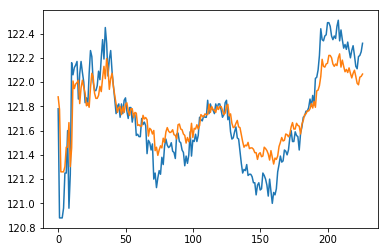

In [41]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# PLot graphs
plt.plot(y_train)
plt.plot(trainPredict)

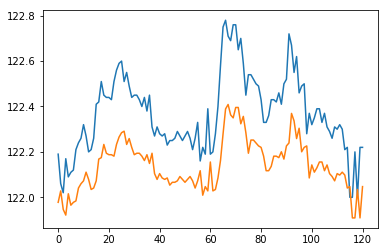

In [42]:
# PLot graphs
plt.plot(testY)
plt.plot(testPredict)